# Customer Analysis For Retail

In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Merge the datasets Customers, Product Hierarchy and Transactions as Customer_Final. Ensure to keep all customers who have done transactions with us and select the join type accordingly.

In [2]:
Customer = pd.read_csv("C:/Users/user/Downloads/Analytics Lab Class Files/Python/Case Study/3.Case Study 1 - Retail Case Study/Customer.csv")
Customer

,customer_Id,DOB,Gender,city_code
0,268408,02-01-1970,M,4.0
1,269696,07-01-1970,F,8.0
2,268159,08-01-1970,F,8.0
3,270181,10-01-1970,F,2.0
4,268073,11-01-1970,M,1.0
...,...,...,...,...
5642,274474,19-12-1992,M,2.0
5643,267666,24-12-1992,M,6.0
5644,270476,25-12-1992,F,3.0
5645,269626,27-12-1992,F,5.0


In [3]:
Product_hierarchy = pd.read_csv("C:/Users/user/Downloads/Analytics Lab Class Files/Python/Case Study/3.Case Study 1 - Retail Case Study/prod_cat_info.csv")
Product_hierarchy

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women
2,1,Clothing,3,Kids
3,2,Footwear,1,Mens
4,2,Footwear,3,Women
5,2,Footwear,4,Kids
6,3,Electronics,4,Mobiles
7,3,Electronics,5,Computers
8,3,Electronics,8,Personal Appliances
9,3,Electronics,9,Cameras


In [4]:
Transaction = pd.read_csv("C:/Users/user/Downloads/Analytics Lab Class Files/Python/Case Study/3.Case Study 1 - Retail Case Study/Transactions.csv")
Transaction

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop
...,...,...,...,...,...,...,...,...,...,...
23048,94340757522,274550,25-01-2011,12,5,1,1264,132.720,1396.720,e-Shop
23049,89780862956,270022,25-01-2011,4,1,1,677,71.085,748.085,e-Shop
23050,85115299378,271020,25-01-2011,2,6,4,1052,441.840,4649.840,MBR
23051,72870271171,270911,25-01-2011,11,5,3,1142,359.730,3785.730,TeleShop


In [5]:
# 1. Merging
Customer_Trans = pd.merge(left = Customer,
                          right = Transaction,
                          left_on = 'customer_Id',
                          right_on = 'cust_id',
                          how = 'inner')
Customer_Trans

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop
1,268408,02-01-1970,M,4.0,16197868036,268408,16-12-2013,1,4,-5,-210,110.250,-1160.250,Flagship store
2,268408,02-01-1970,M,4.0,16197868036,268408,12/12/2013,1,4,5,210,110.250,1160.250,Flagship store
3,268408,02-01-1970,M,4.0,28810141075,268408,2/9/2013,10,6,2,813,170.730,1796.730,TeleShop
4,268408,02-01-1970,M,4.0,64633435931,268408,6/5/2013,4,2,3,312,98.280,1034.280,Flagship store
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,269626,27-12-1992,F,5.0,71369029396,269626,18-10-2011,12,6,1,638,66.990,704.990,e-Shop
23049,269626,27-12-1992,F,5.0,94134051896,269626,7/7/2011,3,1,3,1078,339.570,3573.570,MBR
23050,274308,29-12-1992,F,5.0,26208690928,274308,22-10-2012,1,2,2,898,188.580,1984.580,MBR
23051,274308,29-12-1992,F,5.0,57358822237,274308,5/9/2012,1,2,4,876,367.920,3871.920,e-Shop


In [6]:
# First, merge based on prod_cat_code
Customer_Final = pd.merge(left=Customer_Trans,
                       right=Product_hierarchy,
                       left_on=['prod_cat_code','prod_subcat_code'],
                       right_on=['prod_cat_code','prod_sub_cat_code'],
                       how='inner',
                       suffixes=('', '_sub'))

Customer_Final

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat
0,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,Books,7,Fiction
1,275152,16-01-1970,M,4.0,73109425404,275152,25-03-2011,7,5,2,464,97.440,1025.440,e-Shop,Books,7,Fiction
2,275034,18-01-1970,F,4.0,64777271023,275034,23-05-2011,7,5,2,197,41.370,435.370,Flagship store,Books,7,Fiction
3,270829,22-01-1970,F,8.0,87174343938,270829,9/12/2013,7,5,4,1141,479.220,5043.220,e-Shop,Books,7,Fiction
4,267657,29-01-1970,F,7.0,76242744953,267657,23-05-2013,7,5,4,1020,428.400,4508.400,e-Shop,Books,7,Fiction
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,267812,04-12-1992,F,1.0,63540378797,267812,10/10/2012,10,5,3,224,70.560,742.560,TeleShop,Books,10,Non-Fiction
23049,274618,09-12-1992,F,7.0,71793203305,274618,17-08-2013,10,5,4,691,290.220,3054.220,Flagship store,Books,10,Non-Fiction
23050,268097,15-12-1992,F,7.0,91217108818,268097,1/2/2012,10,5,2,411,86.310,908.310,e-Shop,Books,10,Non-Fiction
23051,268097,15-12-1992,F,7.0,90114483354,268097,31-01-2011,10,5,-4,-1408,591.360,-6223.360,e-Shop,Books,10,Non-Fiction


# 2. Prepare a summary report for the merged data set.


 a. Get the column names and their corresponding data types


In [7]:
Customer_Final.dtypes

customer_Id            int64
DOB                   object
Gender                object
city_code            float64
transaction_id         int64
cust_id                int64
tran_date             object
prod_subcat_code       int64
prod_cat_code          int64
Qty                    int64
Rate                   int64
Tax                  float64
total_amt            float64
Store_type            object
prod_cat              object
prod_sub_cat_code      int64
prod_subcat           object
dtype: object

In [8]:
Customer_Final['tran_date'] = pd.to_datetime(Customer_Final['tran_date'], format='%d-%m-%Y', errors='coerce').combine_first(pd.to_datetime(Customer_Final['tran_date'], format='%d/%m/%Y', errors='coerce'))

In [9]:
Customer_Final['DOB'] = pd.to_datetime(Customer_Final['DOB'], format='%d-%m-%Y')
Customer_Final

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat
0,268408,1970-01-02,M,4.0,87243835584,268408,2014-01-13,7,5,5,187,98.175,1033.175,TeleShop,Books,7,Fiction
1,275152,1970-01-16,M,4.0,73109425404,275152,2011-03-25,7,5,2,464,97.440,1025.440,e-Shop,Books,7,Fiction
2,275034,1970-01-18,F,4.0,64777271023,275034,2011-05-23,7,5,2,197,41.370,435.370,Flagship store,Books,7,Fiction
3,270829,1970-01-22,F,8.0,87174343938,270829,2013-12-09,7,5,4,1141,479.220,5043.220,e-Shop,Books,7,Fiction
4,267657,1970-01-29,F,7.0,76242744953,267657,2013-05-23,7,5,4,1020,428.400,4508.400,e-Shop,Books,7,Fiction
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,267812,1992-12-04,F,1.0,63540378797,267812,2012-10-10,10,5,3,224,70.560,742.560,TeleShop,Books,10,Non-Fiction
23049,274618,1992-12-09,F,7.0,71793203305,274618,2013-08-17,10,5,4,691,290.220,3054.220,Flagship store,Books,10,Non-Fiction
23050,268097,1992-12-15,F,7.0,91217108818,268097,2012-02-01,10,5,2,411,86.310,908.310,e-Shop,Books,10,Non-Fiction
23051,268097,1992-12-15,F,7.0,90114483354,268097,2011-01-31,10,5,-4,-1408,591.360,-6223.360,e-Shop,Books,10,Non-Fiction


Top 10 Observations

In [10]:
Customer_Final.head(10)

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat
0,268408,1970-01-02,M,4.0,87243835584,268408,2014-01-13,7,5,5,187,98.175,1033.175,TeleShop,Books,7,Fiction
1,275152,1970-01-16,M,4.0,73109425404,275152,2011-03-25,7,5,2,464,97.440,1025.440,e-Shop,Books,7,Fiction
2,275034,1970-01-18,F,4.0,64777271023,275034,2011-05-23,7,5,2,197,41.370,435.370,Flagship store,Books,7,Fiction
3,270829,1970-01-22,F,8.0,87174343938,270829,2013-12-09,7,5,4,1141,479.220,5043.220,e-Shop,Books,7,Fiction
4,267657,1970-01-29,F,7.0,76242744953,267657,2013-05-23,7,5,4,1020,428.400,4508.400,e-Shop,Books,7,Fiction
5,274630,1970-02-01,M,4.0,78357345891,274630,2012-04-11,7,5,1,646,67.830,713.830,TeleShop,Books,7,Fiction
6,273541,1970-02-01,M,4.0,23916816961,273541,2013-02-09,7,5,4,410,172.200,1812.200,e-Shop,Books,7,Fiction
7,269008,1970-02-13,F,6.0,35560569829,269008,2013-03-09,7,5,1,1441,151.305,1592.305,e-Shop,Books,7,Fiction
8,269008,1970-02-13,F,6.0,94033312891,269008,2012-04-26,7,5,5,746,391.650,4121.650,MBR,Books,7,Fiction
9,267199,1970-02-14,NaN,2.0,56749259881,267199,2012-01-11,7,5,4,1049,440.580,4636.580,MBR,Books,7,Fiction


10 Bottom Observations

In [11]:
Customer_Final.tail(10)

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat
23043,268914,1992-11-15,F,3.0,1407823655,268914,2011-06-10,10,5,1,1252,131.460,1383.460,MBR,Books,10,Non-Fiction
23044,269519,1992-11-17,M,9.0,29719500605,269519,2013-12-24,10,5,4,1036,435.120,4579.120,TeleShop,Books,10,Non-Fiction
23045,273524,1992-11-25,F,1.0,25762805863,273524,2012-11-19,10,5,1,1401,147.105,1548.105,Flagship store,Books,10,Non-Fiction
23046,272141,1992-12-02,F,10.0,71337087467,272141,2012-07-22,10,5,-3,-1422,447.930,-4713.930,e-Shop,Books,10,Non-Fiction
23047,272141,1992-12-02,F,10.0,71337087467,272141,2012-07-16,10,5,3,1422,447.930,4713.930,e-Shop,Books,10,Non-Fiction
23048,267812,1992-12-04,F,1.0,63540378797,267812,2012-10-10,10,5,3,224,70.560,742.560,TeleShop,Books,10,Non-Fiction
23049,274618,1992-12-09,F,7.0,71793203305,274618,2013-08-17,10,5,4,691,290.220,3054.220,Flagship store,Books,10,Non-Fiction
23050,268097,1992-12-15,F,7.0,91217108818,268097,2012-02-01,10,5,2,411,86.310,908.310,e-Shop,Books,10,Non-Fiction
23051,268097,1992-12-15,F,7.0,90114483354,268097,2011-01-31,10,5,-4,-1408,591.360,-6223.360,e-Shop,Books,10,Non-Fiction
23052,268097,1992-12-15,F,7.0,90114483354,268097,2011-01-26,10,5,4,1408,591.360,6223.360,e-Shop,Books,10,Non-Fiction


 c. “Five-number summary” for continuous variables (min, Q1, median, Q3 and max)


In [12]:
def column(n):
    for i in n:
        if n[i].dtype == 'float' or n[i].dtype == 'int' :
            print(f"min of {i} = {n[i].min()}")
            print(f"Q1 of {i} = {n[i].quantile(0.25)}")
            print(f"median of {i} = {n[i].median()}")
            print(f"Q3 of {i} = {n[i].quantile(0.75)}")
            print(f"max of {i} = {n[i].max()}")

In [13]:
column(Customer_Final)

min of city_code = 1.0
Q1 of city_code = 3.0
median of city_code = 5.0
Q3 of city_code = 8.0
max of city_code = 10.0
min of Tax = 7.35
Q1 of Tax = 98.28
median of Tax = 199.08
Q3 of Tax = 365.715
max of Tax = 787.5
min of total_amt = -8270.925
Q1 of total_amt = 762.45
median of total_amt = 1754.74
Q3 of total_amt = 3569.15
max of total_amt = 8287.5


d. Frequency tables for all the categorical variables


Store type

In [14]:
freq_table = pd.crosstab(index = Customer_Final['Gender'],
                         columns = Customer_Final['Store_type'])
freq_table.columns = ['TeleShop','MBR','e-shop','Flagshipstore']
freq_table.index = ['Male','Female']
freq_table

,TeleShop,MBR,e-shop,Flagshipstore
Male,2264,2264,2147,4558
Female,2313,2395,2353,4750


Prod_cat

In [15]:
freq_table = pd.crosstab(index = Customer_Final['Gender'],
                         columns = Customer_Final['prod_cat'])
freq_table.columns = ['Books','Bags','Clothing','Footwear','Electronics','Home and kitchen']
freq_table.index = ['Male','Female']
freq_table

,Books,Bags,Clothing,Footwear,Electronics,Home and kitchen
Male,994,2949,1439,2328,1529,1994
Female,1004,3116,1518,2570,1469,2134


Prod_subcat

In [16]:
freq_table = pd.crosstab(index = Customer_Final['Gender'],
                         columns = Customer_Final['prod_subcat'])
freq_table.columns = ['Men','Women','Kid','Mobile','Computer','Personal Appliances','Cameras','Audio and video',
                      'Fiction','Academic','Non-fiction','Children','Comics','DIY','Furnishing','Kitchen',
                      'Bath','Tools']
freq_table.index = ['Male','Female']
freq_table

,Men,Women,Kid,Mobile,Computer,Personal Appliances,Cameras,Audio and video,Fiction,Academic,Non-fiction,Children,Comics,DIY,Furnishing,Kitchen,Bath,Tools
Male,518,470,506,447,481,485,468,484,485,477,1035,501,1410,469,496,474,510,1517
Female,449,482,516,538,553,546,490,504,557,530,960,536,1502,562,507,498,552,1529


In [17]:
# Your existing frequency tables
freq_table_store_type = pd.DataFrame({
    'TeleShop': [9767, 10047],
    'MBR': [9687, 10278],
    'e-shop': [9159, 10142],
    'Flagshipstore': [19589, 20584]
}, index=['Male', 'Female'])

freq_table_prod_cat = pd.DataFrame({
    'Books': [1988, 2008],
    'Bags': [17694, 18696],
    'Clothing': [4317, 4554],
    'Footwear': [11640, 12850],
    'Electronics': [4587, 4407],
    'Home and kitchen': [7976, 8536]
}, index=['Male', 'Female'])

freq_table_prod_subcat = pd.DataFrame({
    'Men': [2949, 3116],
    'Women': [2328, 2570],
    'Kid': [1994, 2134],
    'Mobile': [2328, 2570],
    'Computer': [2949, 3116],
    'Personal Appliances': [2949, 3116],
    'Cameras': [2328, 2570],
    'Audio and video': [2949, 3116],
    'Fiction': [2949, 3116],
    'Academic': [1994, 2134],
    'Non-fiction': [2968, 2987],
    'Children': [1994, 2134],
    'Comics': [3962, 3991],
    'DIY': [2328, 2570],
    'Furnishing': [2949, 3116],
    'Kitchen': [2328, 2570],
    'Bath': [1994, 2134],
    'Tools': [3962, 3991]
}, index=['Male', 'Female'])

# Concatenate the tables horizontally
merged_table = pd.concat([freq_table_store_type, freq_table_prod_cat, freq_table_prod_subcat], axis=1)

# Display the merged table
print(merged_table)

        TeleShop    MBR  e-shop  Flagshipstore  Books   Bags  Clothing  \
Male        9767   9687    9159          19589   1988  17694      4317   
Female     10047  10278   10142          20584   2008  18696      4554   

        Footwear  Electronics  Home and kitchen  ...  Fiction  Academic  \
Male       11640         4587              7976  ...     2949      1994   
Female     12850         4407              8536  ...     3116      2134   

        Non-fiction  Children  Comics   DIY  Furnishing  Kitchen  Bath  Tools  
Male           2968      1994    3962  2328        2949     2328  1994   3962  
Female         2987      2134    3991  2570        3116     2570  2134   3991  

[2 rows x 28 columns]


# Q3. Histograms for all continuous variables and frequency bars for categorical variables

Histogram for continous variables -

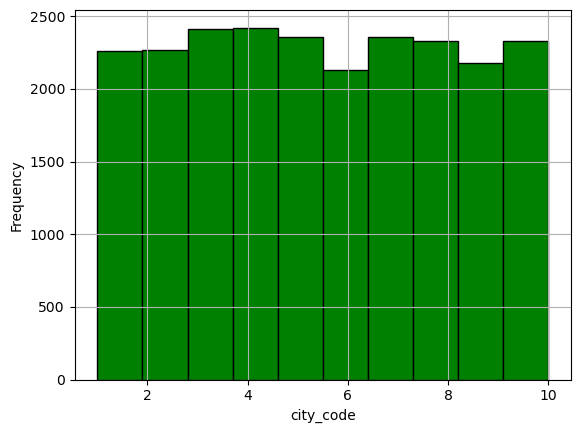

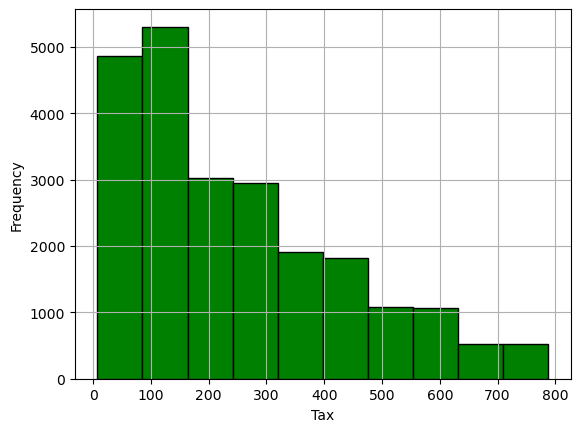

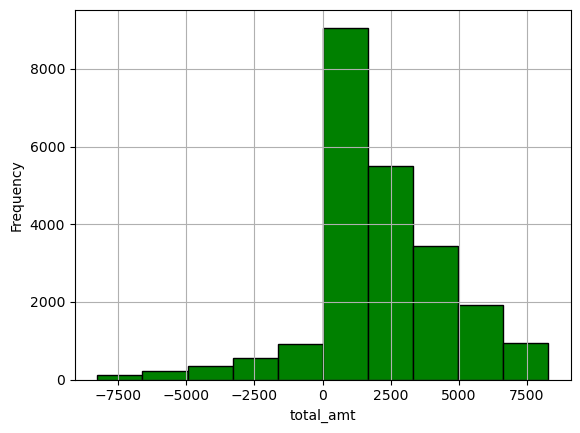

In [18]:
def graph(n):
    for col_name in n:
        if n[col_name].dtypes == "float":
            n[col_name].hist(color='green', edgecolor='black')
            plt.xlabel(col_name)  # Add the column name as x-label
            plt.ylabel('Frequency')
            plt.show()
graph(Customer_Final)

Frequency Bar for Categorical variables -

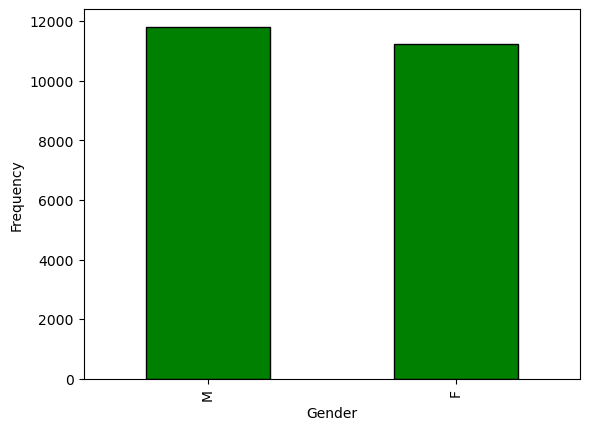

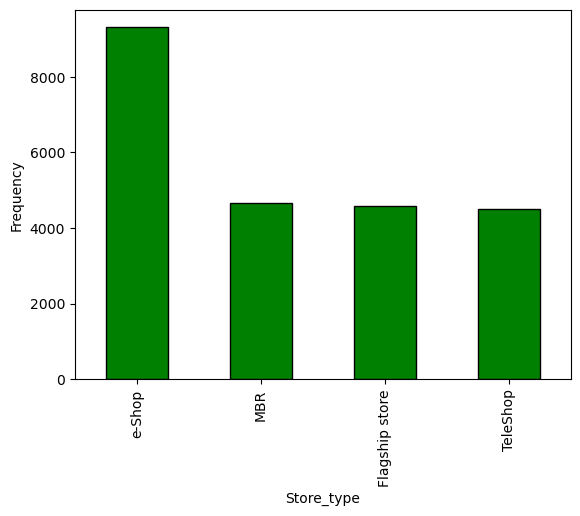

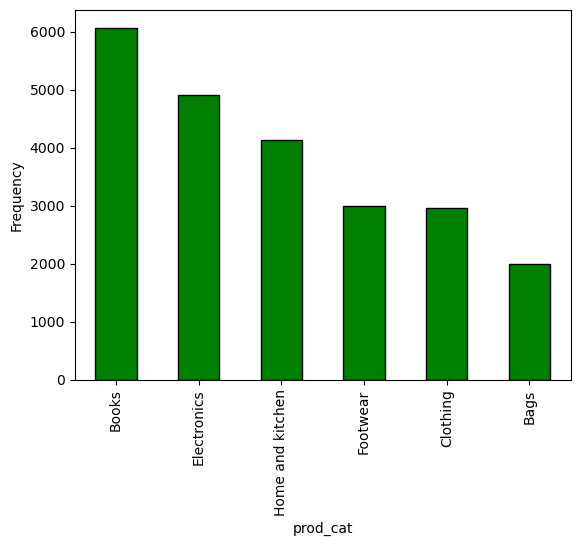

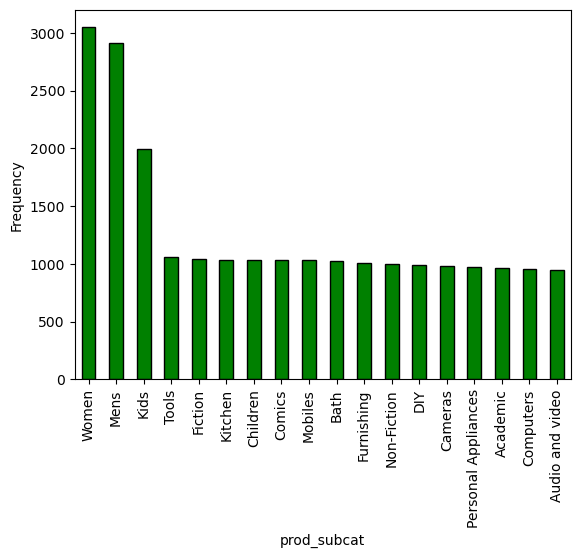

In [19]:
def graph(n):
    for col_name in n:
        if n[col_name].dtypes == "object":
            n[col_name].value_counts().plot.bar(color='green',edgecolor = 'black')
            plt.xlabel(col_name)  # Add the column name as x-label
            plt.ylabel('Frequency')
            plt.show()
graph(Customer_Final)

# 4. Calculate the following information using the merged dataset :


a. Time period of the available transaction data

In [34]:
'''
#import dateutil.parser for parsing the date column
from dateutil.parser import parse

# Convert string dates to datetime objects
Customer_Final['tran_date'] = Customer_Final['tran_date'].apply(lambda x: parse(x))

# Find the minimum and maximum transaction dates
min_date = Customer_Final['tran_date'].min()
max_date = Customer_Final['tran_date'].max()

# Calculate the time period
time_period = max_date - min_date

print("Time period of available transaction data:")
print("Start Date:", min_date)
print("End Date:", max_date)
print("Time Period:", time_period)
'''

'\n#import dateutil.parser for parsing the date column\nfrom dateutil.parser import parse\n\n# Convert string dates to datetime objects\nCustomer_Final[\'tran_date\'] = Customer_Final[\'tran_date\'].apply(lambda x: parse(x))\n\n# Find the minimum and maximum transaction dates\nmin_date = Customer_Final[\'tran_date\'].min()\nmax_date = Customer_Final[\'tran_date\'].max()\n\n# Calculate the time period\ntime_period = max_date - min_date\n\nprint("Time period of available transaction data:")\nprint("Start Date:", min_date)\nprint("End Date:", max_date)\nprint("Time Period:", time_period)\n'

In [35]:
#by converting the 'tran_date' column into date data type
Customer_Final['tran_date'] = Customer_Final['tran_date'].apply(lambda x:pd.to_datetime(x))

# Find the minimum and maximum transaction dates
min_date = Customer_Final['tran_date'].min()
max_date = Customer_Final['tran_date'].max()

# Calculate the time period
time_period = max_date - min_date

print("Time period of available transaction data:")
print("Start Date:", min_date)
print("End Date:", max_date)
print("Time Period:", time_period)

Time period of available transaction data:
Start Date: 2011-01-25 00:00:00
End Date: 2014-02-28 00:00:00
Time Period: 1130 days 00:00:00


 b. Count of transactions where the total amount of transaction was negative


In [22]:
count_neg = Customer_Final[(Customer_Final['total_amt']<0)]['total_amt'].count()
count_neg

2177

# Q5. Analyze which product categories are more popular among females vs male customers.


In [23]:
# Popular among Male
M = Customer_Final.loc[Customer_Final['Gender']=='M']
group_prod = M.groupby(['prod_cat'])['total_amt'].sum()
popular_M = group_prod.nlargest(1)
display('The most popular product category in Male customers is : ',popular_M)

# Popular among Female
F = Customer_Final.loc[Customer_Final['Gender']=='F']
group_prod1 = F.groupby(['prod_cat'])['total_amt'].sum()
popular_F = group_prod1.nlargest(1)
display('The most popular product category in Female customers is : ',popular_F)

'The most popular product category in Male customers is : '

prod_cat
Books    6645972.775
Name: total_amt, dtype: float64

'The most popular product category in Female customers is : '

prod_cat
Books    6164692.235
Name: total_amt, dtype: float64

# Q6. Which City code has the maximum customers and what was the percentage of customers from that city?

In [24]:
max_cust = Customer['city_code'].value_counts()
t = max_cust.nlargest(1)

display("City code which has Maximum customers is : ",t)

#percentage of customers from city code 3
tot_customer = Customer['customer_Id'].count()
percent = round((595/tot_customer)*100,2)
print("Percentage of customers from the city code 3 is {}% : ".format(percent))

'City code which has Maximum customers is : '

3.0    595
Name: city_code, dtype: int64

Percentage of customers from the city code 3 is 10.54% : 


# Q7. Which store type sells the maximum products by value and by quantity?

In [25]:
sort_list = Customer_Final.sort_values(['total_amt','Qty'],ascending = False)
display(sort_list.head(1)['Store_type'])

3184    e-Shop
Name: Store_type, dtype: object

# Q8. What was the total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores?

In [33]:
df = pd.DataFrame(Customer_Final)
tf = df[df.prod_cat.isin(['Electronics','Clothing']) & (df.Store_type == 'Flagship store')]
total = tf.total_amt.sum()
print('Total amount earned',total)

Total amount earned 3409559.27


# Q9. What was the total amount earned from "Male" customers under the "Electronics" category?

In [ ]:
tf1 = df[(df.Gender == 'M') & (df.prod_cat_prod == 'Electronics')]
total = tf1.total_amt.sum()
print('Total amount earned',total)

# Q10. How many customers have more than 10 unique transactions, after removing all transactions which have any negative amounts?

In [27]:
df1 = df[(df.total_amt > 0)]
ts = df1.transaction_id.nunique()
print('Total customers having more than 10 unique transactions are - ',ts)

Total customers having more than 10 unique transactions are -  20876


# Q11. For all customers aged between 25 - 35, find out:

a. What was the total amount spent for “Electronics” and “Books” product categories?

In [28]:
curr_year = pd.to_datetime('today').year
dob_year = pd.DatetimeIndex(df['DOB']).year          #extract year from DOB
x = dob_year-100                                     # for the years which belongs to 60's
v = curr_year - x
y = curr_year - dob_year
df['age'] = (np.where(dob_year > curr_year,v,y))
df

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat,age
0,268408,1970-01-02,M,4.0,87243835584,268408,2014-01-13,7,5,5,187,98.175,1033.175,TeleShop,Books,7,Fiction,53
1,275152,1970-01-16,M,4.0,73109425404,275152,2011-03-25,7,5,2,464,97.440,1025.440,e-Shop,Books,7,Fiction,53
2,275034,1970-01-18,F,4.0,64777271023,275034,2011-05-23,7,5,2,197,41.370,435.370,Flagship store,Books,7,Fiction,53
3,270829,1970-01-22,F,8.0,87174343938,270829,2013-12-09,7,5,4,1141,479.220,5043.220,e-Shop,Books,7,Fiction,53
4,267657,1970-01-29,F,7.0,76242744953,267657,2013-05-23,7,5,4,1020,428.400,4508.400,e-Shop,Books,7,Fiction,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,267812,1992-12-04,F,1.0,63540378797,267812,2012-10-10,10,5,3,224,70.560,742.560,TeleShop,Books,10,Non-Fiction,31
23049,274618,1992-12-09,F,7.0,71793203305,274618,2013-08-17,10,5,4,691,290.220,3054.220,Flagship store,Books,10,Non-Fiction,31
23050,268097,1992-12-15,F,7.0,91217108818,268097,2012-02-01,10,5,2,411,86.310,908.310,e-Shop,Books,10,Non-Fiction,31
23051,268097,1992-12-15,F,7.0,90114483354,268097,2011-01-31,10,5,-4,-1408,591.360,-6223.360,e-Shop,Books,10,Non-Fiction,31


In [31]:
total = df.loc[((df.age >25) & (df.age <35)) & ((df.prod_cat=='Books') | (df.prod_cat=='Electronics'))]['total_amt'].sum()
print('Total amount spent',total)

Total amount spent 3928470.585


b. What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?

In [32]:
Customer_Final['tran_date'] = pd.to_datetime(Customer_Final['tran_date'])

t_date = Customer_Final[(Customer_Final['tran_date'] > '2014-01-01') & (Customer_Final['tran_date'] < '2014-03-01')]
total_amount = t_date.total_amt.sum()
print('Total amount spent by the customer - ',total_amount)

Total amount spent by the customer -  2175087.525
